In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import pickle
import polars as pl
from sklearn.model_selection import KFold, GroupKFold, train_test_split
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm
from collections import defaultdict
import warnings
from itertools import combinations

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [2]:
targets = pd.read_csv('./Data/train_labels.csv')
targets['session'] = targets.session_id.apply(lambda x: int(x.split('_')[0]))
targets['q'] = targets.session_id.apply(lambda x: int(x.split('_')[-1][1:]))
print(targets.shape)

(424116, 4)


In [3]:
targets.head()

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [8]:
# Theoratical values
correct_rate = targets.groupby('q')['correct'].sum()
correct_rate.to_csv('./Acc_f1_Correctrate.csv')

In [18]:
# Correlation between each answers
targets_bygroup = targets.pivot(index='session', columns='q', values='correct')

In [27]:
qcorr=targets_bygroup.corr(method='spearman')


<AxesSubplot:xlabel='q', ylabel='q'>

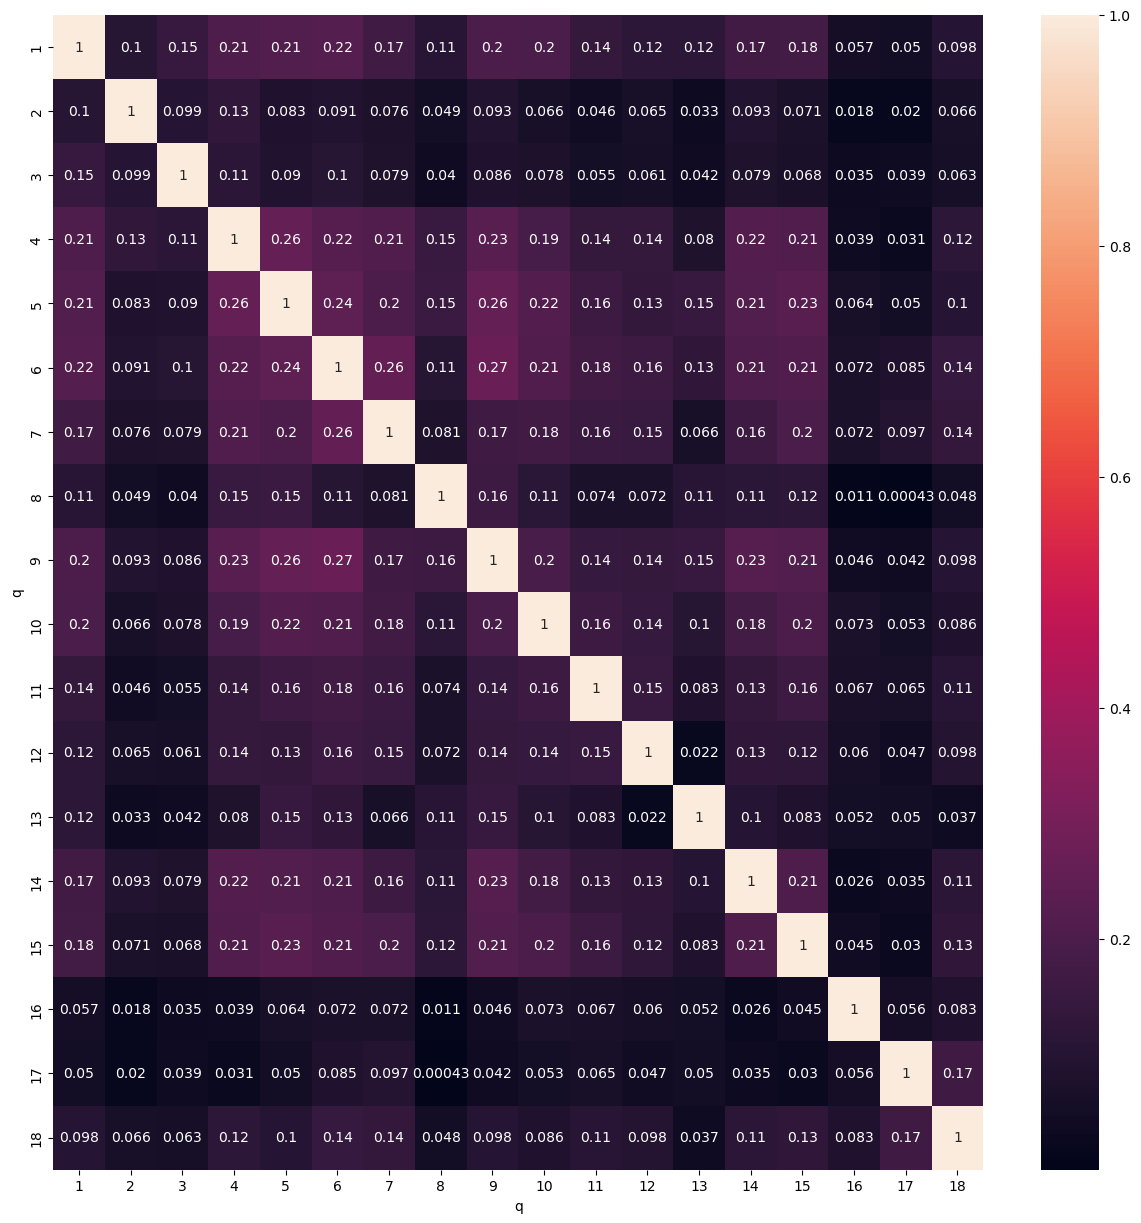

In [28]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(qcorr, annot=True)

In [30]:
for k in range(1,4):
    print(k)

1
2
3
